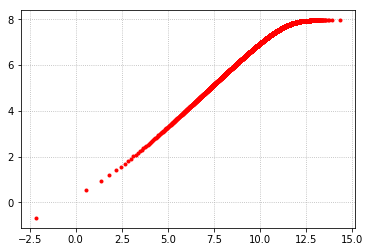

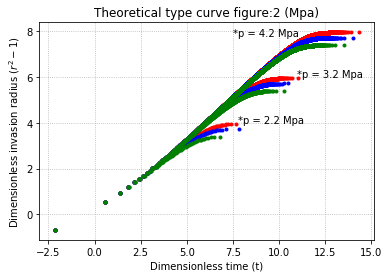

In [5]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np
import pandas as pd

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
tau_y = 5.62             # yield stress pa
r_w = 311.2 /2 /1000     # wellbore radius

# define the dimensionless function for this calculation
a = lambda w: (2*m+1)/(m+1)*(2*r_w)/w*tau_y/delta_p
f = lambda x: 2.**((m+1)/m)*x*(((x**(1-m))-1)/(1-m))**(1/m)/(1-a*(x-1))**(1/m)

delta_ps = [4.2*10**6, 3.2*10**6, 2.2*10**6]
# calculation time step
# dynamic list append
Rad_ds = {}
Time_ds = {}

for delta_p in delta_ps:
    Rad_ds['%i' % delta_p] = []
    Time_ds['%i' % delta_p] = []
    
# iterate the pressure
for j, delta_p in enumerate(delta_ps):
    # dimensionless lost circulation parameters
    # Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
    # Dimensionless_a = [0.0001,0.001,0.008]

    width = [0.0055, 0.00055, 0.000055]
#     # w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p
#     width = [w(a) for a in Dimensionless_a]
    a = lambda w: (2*m+1)/(m+1)*(2.*r_w)/w*tau_y/delta_p
    Dimensionless_a = [a(w) for w in width ]
    
    for k,v in enumerate(Dimensionless_a):

        Radius_d_init = 1.1                            # the initial R_d
        Radius_d_alti = 1 + 1./v                       # the altimate R_d

        Radius_d = np.arange(Radius_d_init, Radius_d_alti)
        total_time_step = len(Radius_d)
        # calculation the time step matrices
        Rad_ds['%i' % delta_p].append(Radius_d);

    # seven matrices
    # use quad integration

    for k,a in enumerate(Dimensionless_a):
        Y = [quad(f,1.01,int_val)[0] for int_val in Rad_ds['%i' % delta_p][k]]
        Time_ds['%i' % delta_p].append(Y)

R_d = pd.DataFrame(Rad_ds)
T_d = pd.DataFrame(Time_ds)

fig, ax = plt.subplots()
ax.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax.yaxis.grid(True, which = 'Major', linestyle='dotted') 

color = ['r', 'b', 'g']
col = 0
for i in delta_ps:         # iterate for delta_ps
    for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
        ax.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '.', c = color[col])
    col += 1
    
plt.title('Theoretical type curve figure:%i (Mpa)' %(delta_p/1000000.))
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()
ax.annotate('*p = 2.2 Mpa', xy = (7.8,4))
ax.annotate('*p = 3.2 Mpa', xy = (11, 6))
ax.annotate('*p = 4.2 Mpa', xy = (7.5,7.8))
# Good time_step algorithm.
# Radius_d  the fluid invasion radius.
plt.show()


## (1) This figure explains the delta_pressure influence the type curve ---SMALL

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 22 16:54:55 2019

@author: rur4893
"""

import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np
import pandas as pd

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
tau_y = 5.62             # yield stress pa
r_w = 311.2 /2 /1000     # wellbore radius

# define the dimensionless function for this calculation
a = lambda w: (2*m+1)/(m+1)*(2*r_w)/w*tau_y/delta_p
f = lambda x: 2.**((m+1)/m)*x*(((x**(1-m))-1)/(1-m))**(1/m)/(1-a*(x-1))**(1/m)

delta_ps = [4.2*10**6, 3.2*10**6, 2.2*10**6]
# calculation time step
# dynamic list append

Rad_ds = {}
Time_ds = {}

for delta_p in delta_ps:
    Rad_ds['%i' % delta_p] = []
    Time_ds['%i' % delta_p] = []

##  Using the same fracture width, BUT lost circulation zone is above the bottom hole

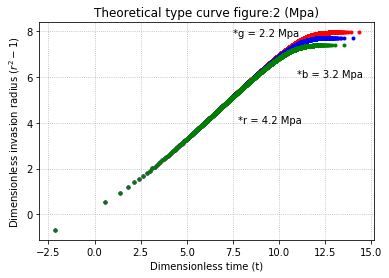

In [14]:

# iterate the pressure
for j, delta_p in enumerate(delta_ps):
    # dimensionless lost circulation parameters
    # Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
    # Dimensionless_a = [0.0001,0.001,0.008]

    #width = [0.0055, 0.00055, 0.000055]
    width = [0.0055]
    
#     # w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p
#     width = [w(a) for a in Dimensionless_a]
    a = lambda w: (2*m+1)/(m+1)*(2.*r_w)/w*tau_y/delta_p
    Dimensionless_a = [a(w) for w in width ]
    
    for k,v in enumerate(Dimensionless_a):

        Radius_d_init = 1.1                            # the initial R_d
        Radius_d_alti = 1 + 1./v                       # the altimate R_d

        Radius_d = np.arange(Radius_d_init, Radius_d_alti)
        total_time_step = len(Radius_d)
        # calculation the time step matrices
        Rad_ds['%i' % delta_p].append(Radius_d);

    # seven matrices
    # use quad integration

    for k,a in enumerate(Dimensionless_a):
        Y = [quad(f,1.01,int_val)[0] for int_val in Rad_ds['%i' % delta_p][k]]
        Time_ds['%i' % delta_p].append(Y)

R_d = pd.DataFrame(Rad_ds)
T_d = pd.DataFrame(Time_ds)

fig, ax = plt.subplots()
ax.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax.yaxis.grid(True, which = 'Major', linestyle='dotted') 

color = ['r', 'b', 'g']
col = 0
for i in delta_ps:         # iterate for delta_ps
    for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
        ax.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '.', c = color[col])
    col += 1
    
plt.title('Theoretical type curve figure:%i (Mpa)' %(delta_p/1000000.))
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')

# plt.legend()
ax.annotate('*r = 4.2 Mpa', xy = (7.8,4))
ax.annotate('*b = 3.2 Mpa', xy = (11, 6))
ax.annotate('*g = 2.2 Mpa', xy = (7.5,7.8))
# Good time_step algorithm.
# Radius_d  the fluid invasion radius.
plt.show()